In [1]:
from verticox.aggregator import Lz, group_samples_at_risk
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
NUM_SAMPLES = 2 # If we want a 2 dimensional input space we need to stick to 2 samples
MIN = -5
MAX = 5
STEP_SIZE = 0.01
WIDTH = int((MAX - MIN)//STEP_SIZE) + 1

RESOLUTION = (WIDTH, WIDTH)
RESOLUTION
PARTIAL_DERIVATIVE_IDX = 0

In [3]:
def compare_functions_3d(f, derivative, diff):
    fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(18,6))
    
    ax1.imshow(f, extent=[MIN, MAX, MAX, MIN], cmap='magma')
    ax1.set_title('Original function')
    ax2.imshow(derivative, extent=[MIN, MAX, MAX, MIN], cmap='magma')
    ax2.set_title('Derivative')
    ax3.imshow(diff, extent=[MIN, MAX, MAX, MIN], cmap='magma')
    ax3.set_title('Diff')

In [4]:
K = 2
gamma = np.arange(NUM_SAMPLES)
sigma = gamma
rho = 0.25
events = [1,2]
Rt = group_samples_at_risk(events, None)

params = Lz.Parameters(gamma, sigma, rho, Rt, K, events)

params

Parameters(gamma=array([0, 1]), sigma=array([0, 1]), rho=0.25, Rt={1: array([0, 1]), 2: array([1])}, K=2, event_times=[1, 2])

In [5]:
def apply_func(f):
    result = np.zeros(RESOLUTION)

    for idx_1, z_1 in enumerate(np.arange(MIN, MAX, STEP_SIZE)):
        for idx_2, z_2 in enumerate(np.arange(MIN, MAX, STEP_SIZE)):
            z = np.array([z_1, z_2])

            result[idx_1, idx_2] = f(z)
        
    return result


## The objective function

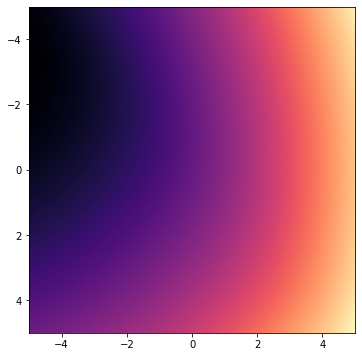

In [6]:
f = lambda z: Lz.parametrized(z, params)

result = apply_func(f)

fig, ax = plt.subplots(figsize=(6,6))

ax.imshow(result, extent=[MIN, MAX, MAX, MIN], cmap='magma')

## First order diff

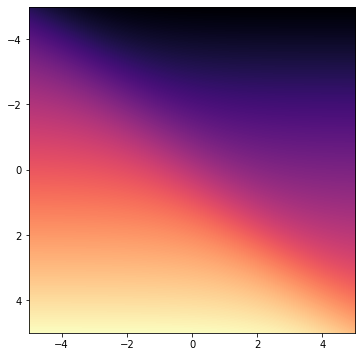

In [7]:
diff = np.diff(result, axis=PARTIAL_DERIVATIVE_IDX)
fig, ax = plt.subplots(figsize=(6,6))

ax.imshow(diff, extent=[MIN, MAX, MAX, MIN], cmap='magma')

## First order partial derivative

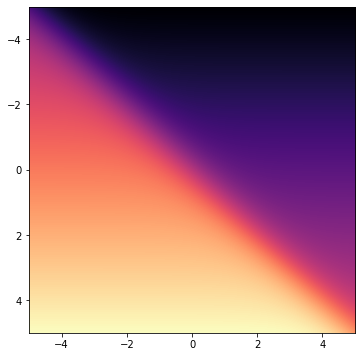

In [8]:
derivative_1 = lambda z: Lz.derivative_1(z, params, PARTIAL_DERIVATIVE_IDX)

result_d1 = apply_func(derivative_1)

fig, ax = plt.subplots(figsize=(6,6))

ax.imshow(result_d1, extent=[MIN, MAX, MAX, MIN], cmap='magma')

### Comparison

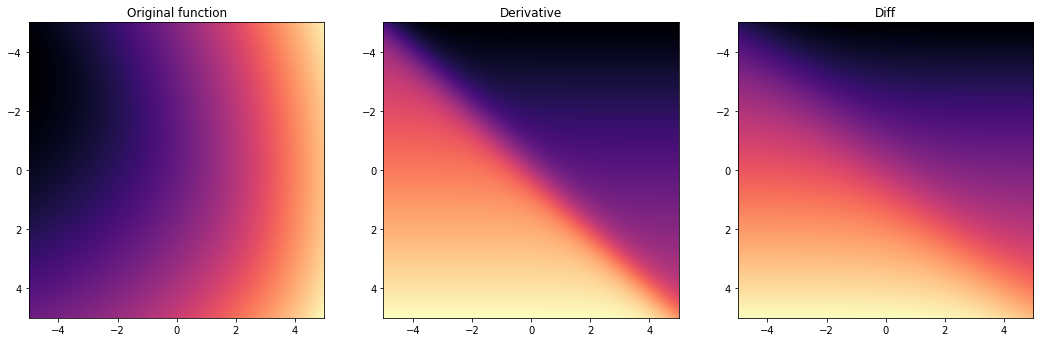

In [9]:
compare_functions_3d(result, result_d1, diff)

In [10]:
# NUM_SAMPLES = 1
# K =1
# gamma = np.arange(NUM_SAMPLES)
# sigma = gamma
# rho = 0.25
# events = [1]
# Rt = group_samples_at_risk(events, None)

# params = Lz.Parameters(gamma, sigma, rho, Rt, K, events)
# params

In [11]:
# onedim_f = lambda z: Lz.parametrized(z, params)
# onedim_derivative_1 = lambda z: Lz.derivative_1(z, params, PARTIAL_DERIVATIVE_IDX)


# z_values = np.arange(MIN, MAX, STEP_SIZE)

# def apply_onedim(f, x):
#     result = np.zeros(x.shape)

#     for idx, z in enumerate(z_values):
#         result[idx] = f(np.array([z]))
#     return result

# onedim_f_result = apply_onedim(onedim_f, z_values)

# fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(18,6))

# ax1.plot(z_values, onedim_f_result)
# ax1.set_title('Objective function')

# ax2.plot(z_values, apply_onedim(onedim_derivative_1, z_values))
# ax2.set_title('First order derivative')

# ax3.plot(z_values[:-1], np.diff(onedim_f_result, axis=0))
# ax3.set_title('np.diff')



## Second order partial derivative
### Diagonal

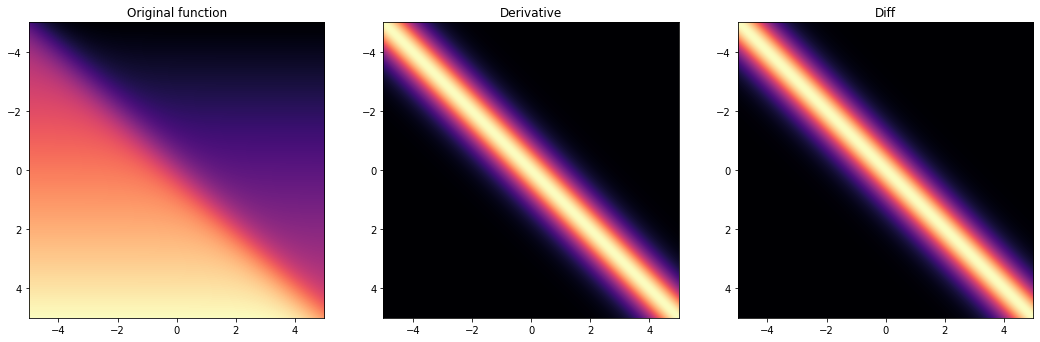

In [12]:
derivative_2_diagonal = lambda z: Lz.derivative_2_diagonal(z, params, PARTIAL_DERIVATIVE_IDX)

result_d2_diagonal = apply_func(derivative_2_diagonal)

diff_d2_diagonal = np.diff(result_d1, axis=0)

compare_functions_3d(result_d1, result_d2_diagonal, diff_d2_diagonal)

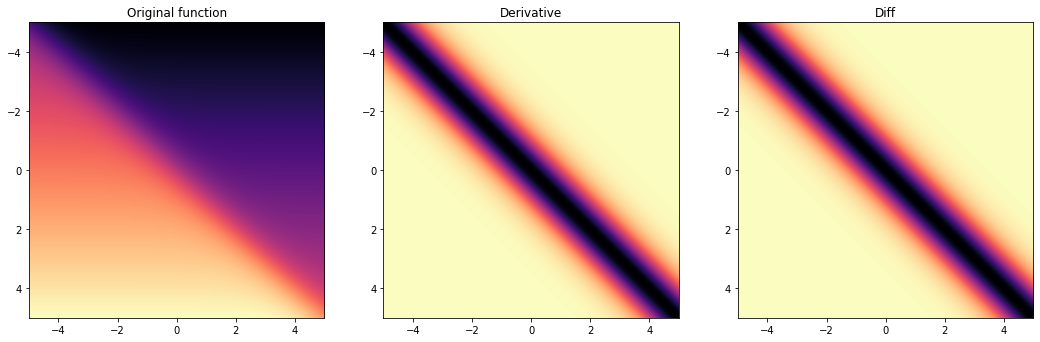

In [13]:
PARTIAL_DERIVATIVE_IDX_2 = 1

derivative_2_off_diagonal = lambda z: Lz.derivative_2_off_diagonal(z, params, PARTIAL_DERIVATIVE_IDX, PARTIAL_DERIVATIVE_IDX_2)

result_d2_off_diagonal = apply_func(derivative_2_off_diagonal)

diff_d2_off_diagonal = np.diff(result_d1, axis=1)

compare_functions_3d(result_d1, result_d2_off_diagonal, diff_d2_off_diagonal)

In [22]:
from numpy import array

new_params = Lz.Parameters(gamma=array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]), sigma=array([2.57876280e+10, 2.07901519e+10, 2.48679711e+10, 2.09550308e+10,
       2.23521728e+10, 1.65974180e+10, 2.96888827e+10, 2.52415055e+10,
       3.11698540e+10, 2.83222784e+10]), rho=0.5, Rt={1.0: array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), 297.0: array([0, 1, 2, 3, 4, 6, 7, 8, 9]), 920.0: array([0, 1, 2, 4, 6, 7, 8, 9]), 1496.0: array([0, 1, 2, 4, 6, 7, 9]), 2122.0: array([0, 1, 2, 4, 6, 9]), 2131.0: array([0, 1, 2, 4, 9]), 2172.0: array([0, 1, 2, 9]), 2175.0: array([0, 2, 9]), 2178.0: array([0, 2]), 2190.0: array([2])}, K=2, event_times=array([2.178e+03, 2.172e+03, 2.190e+03, 2.970e+02, 2.131e+03, 1.000e+00,
       2.122e+03, 1.496e+03, 9.200e+02, 2.175e+03]))

In [24]:
realistic_Lz = lambda z: Lz.parametrized(z, new_params)

realistic_output  = apply_func(realistic_Lz)

IndexError: index 2 is out of bounds for axis 0 with size 2